# UPop Simulator
Evan Kesten (ebk46)

Kiyan Rajabi (kr499)

Roy Cohen (rc726)

### Imports

In [1]:
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt

### Simulated Consumers, Providers, and Ad Types

In [2]:
consumers = ["Evan", "Kiyan", "Roy"]
providers = ["Google", "Clicksor", "BuySellAds"]
ad_types = ["popup", "prestitial", "large-sticky", "video-autoplay"]

### Consumer Preferences (with sample values)

In [3]:
consumer_balances = {"123abc":0, "456def":0, "789ace":0}

consumer_pref = {
    "Evan": {
        "blacklist": [],
        "iota_addr": "123abc",
        "prices": {
            "popup": 0.0008,
            "prestitial": 0.001,
            "large-sticky": 0.0015,
            "video-autoplay": 0.01
        }
    },
    "Kiyan": {
        "blacklist": [],
        "iota_addr": "456def",
        "prices": {
            "popup": 0.0006,
            "prestitial": 0.0012,
            "large-sticky": 0.001,
            "video-autoplay": 0.012
        }   
    },
    "Roy": {
        "iota_addr": "789ace",
        "blacklist": [],
        "prices": {
            "popup": 0.0006,
            "prestitial": 0.0008,
            "large-sticky": 0.001,
            "video-autoplay": 0.009
        }   
    }
}

### Provider Preferences (with sample values)

In [4]:
provider_pref = {
    "Google": {
        "balance": 20000,
        "prices": {
            "popup": 0.001,
            "prestitial": 0.002,
            "large-sticky": 0.002,
            "video-autoplay": 0.03
        }
    },
    "Clicksor": {
        "balance": 20000,
        "prices": {
            "popup": 0.0007,
            "prestitial": 0.0011,
            "large-sticky": 0.0012,
            "video-autoplay": 0.01
        }
    },
    "BuySellAds": {
        "balance": 20000,
        "prices": {
            "popup": 0.01,
            "prestitial": 0.01,
            "large-sticky": 0.015,
            "video-autoplay": 0.02
        }
    }
}

### Randomize Consumer Preferences

In [58]:
def rand_consumers(price=0.0004):
    inc = price * 0.1
    for c in consumers:
        consumer_balances[consumer_pref[c]["iota_addr"]] = 0
        consumer_pref[c]["prices"]["popup"] = max(0, np.random.normal(price, price/2, 1)[0])
        price += inc
        consumer_pref[c]["prices"]["prestitial"] = max(0, np.random.normal(price, price/2, 1)[0])
        price += inc
        consumer_pref[c]["prices"]["large-sticky"] = max(0, np.random.normal(price, price/2, 1)[0])
        price += inc
        consumer_pref[c]["prices"]["video-autoplay"] = max(0, np.random.normal(price, price/2, 1)[0])
        consumer_pref[c]["blacklist"] = []
        for p in providers:
            if np.random.ranf() < 0.05:
                consumer_pref[c]["blacklist"].append(p)

### Randomize Provider Preferences

In [59]:
def rand_providers(price=0.0003):
    inc = price * 0.1
    for p in providers:
        provider_pref[p]["balance"] = 20000
        provider_pref[p]["prices"]["popup"] = max(0, np.random.normal(price, price/2, 1)[0])
        price += inc
        provider_pref[p]["prices"]["prestitial"] = max(0, np.random.normal(price, price/2, 1)[0])
        price += inc
        provider_pref[p]["prices"]["large-sticky"] = max(0, np.random.normal(price, price/2, 1)[0])
        price += inc
        provider_pref[p]["prices"]["video-autoplay"] = max(0, np.random.normal(price, price/2, 1)[0])

### Random Ad Generation

Average of 200 ads per day per person is conservative vs 264: http://customerexperiencematrix.blogspot.com/2015/09/how-many-ads-per-day-do-you-see-fewer.html

200 ads per day per person * 365 days * 3 people= 159,000 ads per year for 3 people

In [60]:
def generate_ads(num_ads=200*365*len(consumers)):
    consumers_i = np.random.choice(range(len(consumers)), num_ads)
    providers_i = np.random.choice(range(len(providers)), num_ads)
    ad_types_i = np.random.choice(range(len(ad_types)), num_ads)
    ads = list(zip(consumers_i, providers_i, ad_types_i))
    return ads

### Simulation of Ads (one full simulation of all ads)

In [61]:
def run_sim(ads):
    log = []
    for ad in ads:
        c = consumers[ad[0]]
        p = providers[ad[1]]
        t = ad_types[ad[2]]
        c_price = consumer_pref[c]["prices"][t]
        c_addr = consumer_pref[c]["iota_addr"]
        blacklist = consumer_pref[c]["blacklist"]
        p_price = provider_pref[p]["prices"][t]
        p_balance = provider_pref[p]["balance"]
        if p not in blacklist and p_price >= c_price and p_balance >= c_price:
            consumer_balances[c_addr] += c_price
            provider_pref[p]["balance"] -= c_price
            log.append("%s sent %f MIOTA to %s for a %s ad" % (p, c_price, c_addr, t))
    return consumer_balances, log

### Simulations (20 Trials for each pair of parameters)
Parameters: [Consumer Prices, Provider Prices]

In [84]:
trials = 20
all_logs = {}
all_balances = {}
for c_price in [0.0003, 0.0015, 0.003, 0.015, 0.03]:
    all_logs[c_price] = {}
    all_balances[c_price] = {}
    for p_price in [0.0003, 0.0015, 0.003, 0.015, 0.03]:
        all_logs[c_price][p_price] = []
        all_balances[c_price][p_price] = 0
        for i in range(trials):
            rand_consumers(c_price)
            rand_providers(p_price)
            ads = generate_ads()
            b, l = run_sim(ads)
            all_logs[c_price][p_price].append(l)
            all_balances[c_price][p_price] += np.mean(list(b.values()))
        all_balances[c_price][p_price] /= trials
            

In [85]:
pprint(all_balances)

{0.0003: {0.0003: 9.52300752689561,
          0.0015: 28.630210965844952,
          0.003: 29.509332055427898,
          0.015: 28.018343926069292,
          0.03: 29.918629700343956},
 0.0015: {0.0003: 1.6128181737421354,
          0.0015: 56.31676195141064,
          0.003: 107.17878510699748,
          0.015: 142.18425769305787,
          0.03: 145.68566983804402},
 0.003: {0.0003: 0.23201432476769734,
         0.0015: 24.508433104575573,
         0.003: 108.47642237467885,
         0.015: 285.86851712606557,
         0.03: 301.8057789632292},
 0.015: {0.0003: 0.0,
         0.0015: 0.39925667282422084,
         0.003: 11.72898728011991,
         0.015: 536.3960647192497,
         0.03: 1098.4306553861563},
 0.03: {0.0003: 0.14322748423524131,
        0.0015: 0.7270291108377549,
        0.003: 2.2213559750180947,
        0.015: 241.22257891830594,
        0.03: 1046.99187598872}}


### Price/Preference Assignment Description

Popup types mirror those from the Better Ads Standards. Consumer and Provider price preferences were set with the following assumptions in mind:
- More obstructive ads cost more to show, on average
- Consumers and Providers are individuals, and prices for each ad type for each person/provider will differ

Therefore, the prices were set for each person according to a gaussian distribution and the following rules:
- Provided an average price for a popup for that person, each increased level of obtrusiveness (popup < prestitial < large-sticky < video-autoplay) results in an increase of 10% to the average price (consumers and providers)
- Each ad type price has a standard deviation of 0.5 * average price to account for a lot of deviation by individuals
- Prices below zero are considered to be zero (not interested)

In addition, each time a consumer is generated, there is a 5% for each provider to be on their blacklist, in which case they would not see the ad and revenue is not earned.

Each set of simulation trials adjusts the average popup price asymmetrically for consumers and providers.

### Simulation Description

Each price assignment is run for 20 trials and the average revenue across all consumers/trials is calculated. The simulation verifies the following before transferring money:
- The provider must not be on the consumer's blacklist
- The provider's price for an ad must be lower than the provider's price for the ad
- The provider's balance must be higher than the consumers's price for the ad

If these conditions are verified, the consumer's price worth of IOTA is added to the consumer's IOTA address, and the same amount is deducted from the provider's balance.

The simulation is intended to represent one year with an average of 200 ads per day per person. This is conservative as compared to the 264 indicated in this article: http://customerexperiencematrix.blogspot.com/2015/09/how-many-ads-per-day-do-you-see-fewer.html

### Plot Results (Broken by Consumer Price)

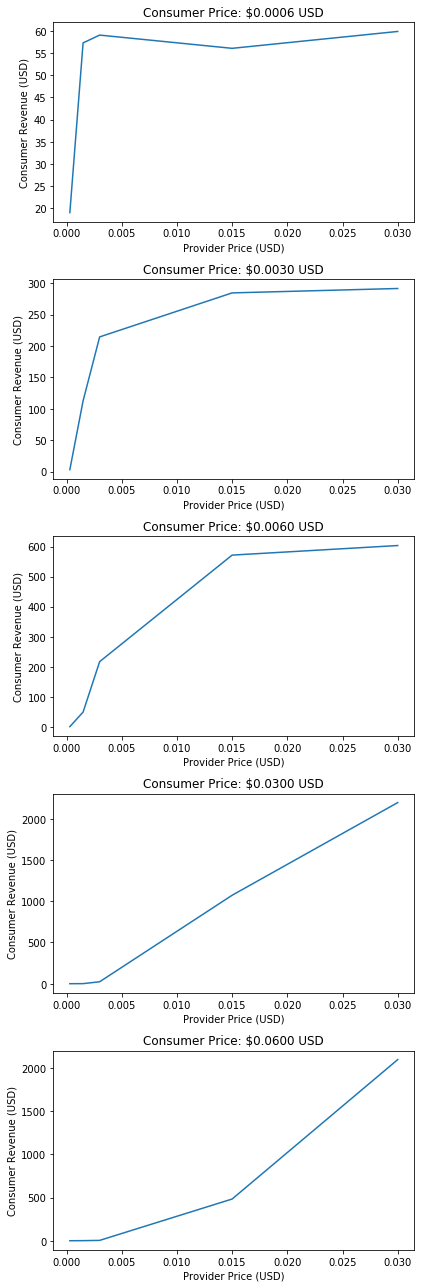

In [86]:
fig, ax = plt.subplots(5, figsize=(6,18))
iota_to_usd = 2

y = 0
for c_price, data in all_balances.items():
    data_x = []
    data_y = []
    for p_price, revenue in data.items():
        data_x.append(p_price)
        rev_usd = iota_to_usd * revenue
        data_y.append(rev_usd)
    ax[y].plot(data_x, data_y)
    ax[y].set_title("Consumer Price: $%.4f USD" % (c_price*iota_to_usd))
    ax[y].set_xlabel("Provider Price (USD)")
    ax[y].set_ylabel("Consumer Revenue (USD)")
    y += 1
plt.tight_layout()

### Plot Results (Aggregate)

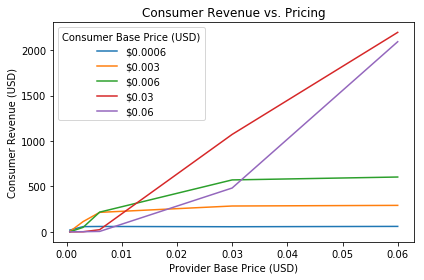

In [87]:
fig, ax = plt.subplots(figsize=(6,4))
iota_to_usd = 2

for c_price, data in all_balances.items():
    c_price_usd = c_price*iota_to_usd
    data_x = []
    data_y = []
    for p_price, revenue in data.items():
        data_x.append(p_price*iota_to_usd)
        rev_usd = iota_to_usd * revenue
        data_y.append(rev_usd)
    ax.plot(data_x, data_y, label="$" + str(c_price*iota_to_usd))
ax.set_title("Consumer Revenue vs. Pricing")
ax.set_xlabel("Provider Base Price (USD)")
ax.set_ylabel("Consumer Revenue (USD)")
plt.legend(title="Consumer Base Price (USD)")
plt.tight_layout()

### Analysis

From the plot, we can see that consumers can make up to $2200 per year using UPop. Ad providers may be unwilling to pay this amount for each consumer, so this plot shows where the various points of compromise might lie between both parties.

As can be seen, a higher consumer price typically results in a higher revenue, but that is dependent on a provider price that is high enough to enable enough transactions. The highest revenue was actually generated with a consumer price of $0.03, which was not the highest one. This suggests that a consumer willing to lower their price and see more ads could maximize their revenue. However, the difference is small so it may not be worth their time.